## 作業
在鐵達尼資料集中，今天我們專注觀察變數之間的相關性，以Titanic_train.csv 中，首先將有遺失值的數值刪除，並回答下列問題。
* Q1: 透過數值法計算  Age 和  Survived  是否有相關性?
* Q2:透過數值法計算  Sex 和 Survived  是否有相關性?
* Q3: 透過數值法計算  Age 和  Fare 是否有相關性?   
* 提示:    
1.產稱一個新的變數 Survived_cate ，資料型態傳換成類別型態      
2.把題目中的 Survived 用 Survived_cate 來做分析       
3.首先觀察一下這些變數的資料型態後，再來想要以哪一種判斷倆倆的相關性。     


In [1]:
# import library
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import math
import statistics
import seaborn as sns
from IPython.display import display

import pingouin as pg
import researchpy   
%matplotlib inline

C:\Users\user\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## 讀入資料

In [4]:
df_train = pd.read_csv("Titanic_train.csv")
print(df_train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [6]:
## 這邊我們做一個調整，把 Survived 變成離散型變數 Survived_cate
#把他變成object的物件
df_train['Survived_cate'] = df_train['Survived']
df_train['Survived_cate'] = df_train['Survived_cate'].astype('object')
print(df_train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PassengerId    891 non-null    int64  
 1   Survived       891 non-null    int64  
 2   Pclass         891 non-null    int64  
 3   Name           891 non-null    object 
 4   Sex            891 non-null    object 
 5   Age            714 non-null    float64
 6   SibSp          891 non-null    int64  
 7   Parch          891 non-null    int64  
 8   Ticket         891 non-null    object 
 9   Fare           891 non-null    float64
 10  Cabin          204 non-null    object 
 11  Embarked       889 non-null    object 
 12  Survived_cate  891 non-null    object 
dtypes: float64(2), int64(5), object(6)
memory usage: 90.6+ KB
None


In [7]:
display(df_train.head())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived_cate
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


###  Q1: 透過數值法計算  Age 和  Survived  是否有相關性?


In [21]:
#年齡是連續型，生存變數是離散型，故使用eta square 用anova可以找出
#在計算相關性時，不允許有NAN，要先進行補植或刪除
dropna_data = df_train[['Age','Survived_cate']].dropna()
display(dropna_data)
#進行anova
anova = pg.anova(dv = 'Age',between = 'Survived_cate',data = dropna_data,detailed = True)
display(anova)
#計算eta square
eta_squ = anova.SS[0]/(anova.SS[0]+anova.SS[1])
print('得到的eta_square是',eta_squ)


,Age,Survived_cate
0,22.0,0
1,38.0,1
2,26.0,1
3,35.0,1
4,35.0,0
...,...,...
885,39.0,0
886,27.0,0
887,19.0,1
889,26.0,1


,Source,SS,DF,MS,F,p-unc,np2
0,Survived_cate,897.187582,1,897.187582,4.271195,0.039125,0.005963
1,Within,149559.448362,712,210.055405,NaN,NaN,NaN


得到的eta_square是 0.0059630974469252


In [35]:
#進一步用簡單定義式來確認相關性高低 elif的用處就算條件符合，但是前一個條件若已達成那我也不會進入elif中
def judgement(eta_squ):
    if eta_squ < 0.01:
        a = '沒啥相關'
    elif eta_squ < 0.06:
        a = 'small'
    elif eta_squ <0.14:
        a = 'medium'
    else:
        a = 'large'
    return a
print(judgement(eta_squ))
print('結論: 年紀和存活沒有相關性(drop_data)，思考是否需要放入模型，或者要深入觀察特性，是否需要做特徵轉換')

沒啥相關
結論: 年紀和存活沒有相關性(drop_data)，思考是否需要放入模型，或者要深入觀察特性，是否需要做特徵轉換


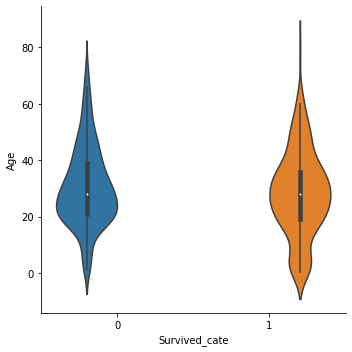

In [31]:
#做個小提琴圖
violin = sns.catplot(x = 'Survived_cate',y = 'Age',hue = 'Survived_cate',data = dropna_data,kind = 'violin') 

### Q2:透過數值法計算  Sex 和 Survived  是否有相關性?


In [53]:
#性別和生存結果都是離散型 要用cramer's V 先做交叉表 交叉表就是看 活著的女生 活著的男生 跟相反者 的人數
cont_table = pd.crosstab(df_train['Sex'],df_train['Survived_cate'])
cont_table

Survived_cate,0,1
Sex,,
female,81,233
male,468,109


In [79]:
#算自由度
df = min(cont_table.shape[1],cont_table.shape[0])-1

cross , res = researchpy.crosstab(df_train['Sex'],df_train['Survived_cate'],test = 'chi-square')
display(cross)
display(res)
print("Cramer's V is ",res.results[2])

Survived_cate          
Survived_cate             0    1  All
Sex                                  
female                   81  233  314
male                    468  109  577
All                     549  342  891

,Chi-square test,results
0,Pearson Chi-square ( 1.0) =,263.0506
1,p-value =,0.0000
2,Cramer's phi =,0.5434


Cramer's V is  0.5434


In [80]:
#寫一個簡易的判定式
def judgment_CramerV(df,V):
    if df == 1:
        if V < 0.10:
            qual = 'negligible'
        elif V < 0.30:
            qual = 'small'
        elif V < 0.50:
            qual = 'medium'
        else:
            qual = 'large'
    elif df == 2:
        if V < 0.07:
            qual = 'negligible'
        elif V < 0.21:
            qual = 'small'
        elif V < 0.35:
            qual = 'medium'
        else:
            qual = 'large'
    elif df == 3:
        if V < 0.06:
            qual = 'negligible'
        elif V < 0.17:
            qual = 'small'
        elif V < 0.29:
            qual = 'medium'
        else:
            qual = 'large'
    elif df == 4:
        if V < 0.05:
            qual = 'negligible'
        elif V < 0.15:
            qual = 'small'
        elif V < 0.25:
            qual = 'medium'
        else:
            qual = 'large'
    else:
        if V < 0.05:
            qual = 'negligible'
        elif V < 0.13:
            qual = 'small'
        elif V < 0.22:
            qual = 'medium'
        else:
            qual = 'large'
    return(qual)
print(judgment_CramerV(df,res.results[2]))
print('因此性別和存活機率有一定關聯應納入考慮。')

large
因此性別和存活機率有一定關聯應納入考慮。


### Q3: 透過數值法計算  Age 和  Fare 是否有相關性?  

In [66]:
#年齡跟票價都是連續的 用皮爾森相關係數
#因為都是連續的 所以第一步先去除NAN
drop_data = df_train[['Age','Fare']].dropna()
display(drop_data)

,Age,Fare
0,22.0,7.2500
1,38.0,71.2833
2,26.0,7.9250
3,35.0,53.1000
4,35.0,8.0500
...,...,...
885,39.0,29.1250
886,27.0,13.0000
887,19.0,30.0000
889,26.0,30.0000


In [74]:
#皮爾森R有兩個回傳結果
corr , p_value = stats.pearsonr(drop_data['Age'],drop_data['Fare'])
print('相關係數為',corr)
print("p_value為",p_value)

相關係數為 0.09606669176903891
p_value為 0.010216277504442105


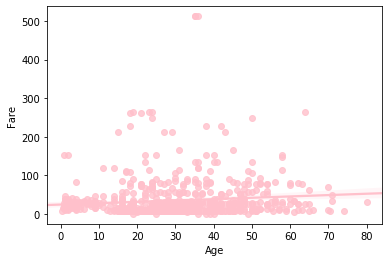

In [78]:
#做回歸圖型
reg = sns.regplot(x = 'Age',y = 'Fare',data = drop_data,color = 'pink')
